# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step1. 下載資料

In [2]:
#下載資料
breast_cancer=datasets.load_breast_cancer()
#將數據及目標轉為dataframe形式
x = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
y = pd.DataFrame(breast_cancer['target'], columns=['target'])
#將數據及目標匯集成同一數據集
breast_cancer_data = pd.concat([x,y], axis=1)
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

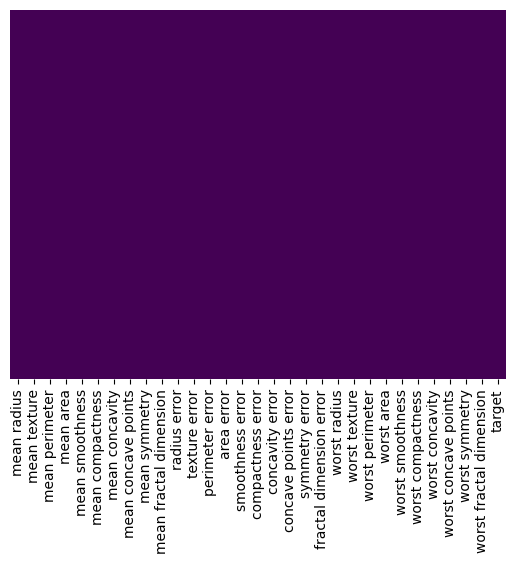

In [3]:
#確認資料有無遺漏
sns.heatmap(breast_cancer_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Step2. 區分訓練集與測試集

In [4]:
#將mean radius及worst radius作為訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data[['mean radius','worst radius']], breast_cancer_data[['target']], test_size=0.3, random_state=0)

## Step3. 建模

In [5]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto', kernel='poly')

## Step4. 預測

```

```


In [6]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

## Step5. 準確度分析

In [7]:
print('train accuracy:',clf.score(X_train,y_train))
print('test accuracy:',clf.score(X_test, y_test))

train accuracy: 0.9271356783919598
test accuracy: 0.9532163742690059
